In [1]:
# import the require libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd

# Loading dataset:

In [2]:
df_1=pd.read_csv(r"D:/hamza/B pillar/Oasis data/Unemployment data/Unemployment dataset/Unemployment in India.csv")
df_2=pd.read_csv(r"D:/hamza/B pillar/Oasis data/Unemployment data/Unemployment dataset/Unemployment_Rate_upto_11_2020.csv")

# Dataset # 1: (Unemployment in India)

In [3]:
df_1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df_1.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df_1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
df_1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
# column names have extra space so we are eliminating it.
col_map={col:col.strip() for col in df_1.columns}
df_1.rename(columns=col_map,inplace =True)

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [10]:
#Dropping all rows with NaN Values:
df_1=df_1.dropna(axis=0)

In [11]:
df_1.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [12]:
df_1.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [13]:
# Changing data type of date column:
df_1['Date']=pd.to_datetime(df_1['Date'],dayfirst=True)

In [14]:
# Splitting date in years, Months and days:
df_1['Day']=df_1['Date'].dt.day
df_1['Month']=df_1['Date'].dt.month
df_1['Year']=df_1['Date'].dt.year

In [15]:
# Date column has been dropped.
df_1.drop('Date',axis=1)

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,31,5,2019
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,30,6,2019
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,31,7,2019
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,31,8,2019
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,30,9,2019
...,...,...,...,...,...,...,...,...,...
749,West Bengal,Monthly,7.55,10871168.0,44.09,Urban,29,2,2020
750,West Bengal,Monthly,6.67,10806105.0,43.34,Urban,31,3,2020
751,West Bengal,Monthly,15.63,9299466.0,41.20,Urban,30,4,2020
752,West Bengal,Monthly,15.22,9240903.0,40.67,Urban,31,5,2020


In [16]:
# changing the sequence of the columns:
df_1=df_1[['Region','Day','Month','Year','Frequency','Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)','Area']]

In [17]:
df_1

,Region,Day,Month,Year,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31,5,2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30,6,2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31,7,2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31,8,2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30,9,2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...,...,...
749,West Bengal,29,2,2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31,3,2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30,4,2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31,5,2020,Monthly,15.22,9240903.0,40.67,Urban


In [18]:
# Checking the regions in the unemployment list:
number_region=df_1['Region'].unique()
number_region=pd.DataFrame(number_region)

In [19]:
number_region

,0
0,Andhra Pradesh
1,Assam
2,Bihar
3,Chhattisgarh
4,Delhi
5,Goa
6,Gujarat
7,Haryana
8,Himachal Pradesh
9,Jammu & Kashmir


There are "28" State or region data.

In [20]:
# Making table of region with average Estimated unemployment Rate:
df_mean=df_1.groupby(['Region'])['Estimated Unemployment Rate (%)'].mean().reset_index()
df_mean = df_mean.rename(columns={'Region': 'st_nm'})
df_mean

,st_nm,Estimated Unemployment Rate (%)
0,Andhra Pradesh,7.477143
1,Assam,6.428077
2,Bihar,18.918214
3,Chandigarh,15.991667
4,Chhattisgarh,9.240357
5,Delhi,16.495357
6,Goa,9.274167
7,Gujarat,6.663929
8,Haryana,26.283214
9,Himachal Pradesh,18.540357


In [21]:
# Making table with group of region, area and Year with average Estimated unemployment Rate:
mean_unemployment_rate=df_1.groupby(['Region','Area','Year'])['Estimated Unemployment Rate (%)'].mean()

In [22]:
mean_unemployment_rate=pd.DataFrame(mean_unemployment_rate)
mean_unemployment_rate

Estimated Unemployment Rate (%)
Region         Area  Year                                 
Andhra Pradesh Rural 2019                         3.870000
                     2020                         7.735000
               Urban 2019                         5.783750
                     2020                        14.286667
Assam          Rural 2019                         4.741429
...                                                    ...
Uttarakhand    Urban 2020                         9.661667
West Bengal    Rural 2019                         5.841250
                     2020                         9.880000
               Urban 2019                         7.410000
                     2020                        10.366667

[110 rows x 1 columns]

In [23]:
mean_unemployment_rate = mean_unemployment_rate.reset_index()
mean_unemployment_rate

,Region,Area,Year,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,2019,3.870000
1,Andhra Pradesh,Rural,2020,7.735000
2,Andhra Pradesh,Urban,2019,5.783750
3,Andhra Pradesh,Urban,2020,14.286667
4,Assam,Rural,2019,4.741429
...,...,...,...,...
105,Uttarakhand,Urban,2020,9.661667
106,West Bengal,Rural,2019,5.841250
107,West Bengal,Rural,2020,9.880000
108,West Bengal,Urban,2019,7.410000


In [24]:
# renaming Region to st_nm for future use:
mean_unemployment_rate = mean_unemployment_rate.rename(columns={'Region': 'st_nm'})

In [25]:
# dataset rows with only area=Rural:
mean_unemployment_rate_Rural=mean_unemployment_rate[mean_unemployment_rate['Area']=='Rural']
# dataset rows with only area =Urban:
mean_unemployment_rate_Urban=mean_unemployment_rate[mean_unemployment_rate['Area']=='Urban']

In [26]:
mean_unemployment_rate_Rural

,st_nm,Area,Year,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,2019,3.870000
1,Andhra Pradesh,Rural,2020,7.735000
4,Assam,Rural,2019,4.741429
5,Assam,Rural,2020,4.140000
8,Bihar,Rural,2019,10.976250
9,Bihar,Rural,2020,24.495000
14,Chhattisgarh,Rural,2019,6.241250
15,Chhattisgarh,Rural,2020,7.145000
18,Delhi,Rural,2019,13.320000
19,Delhi,Rural,2020,17.843333


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


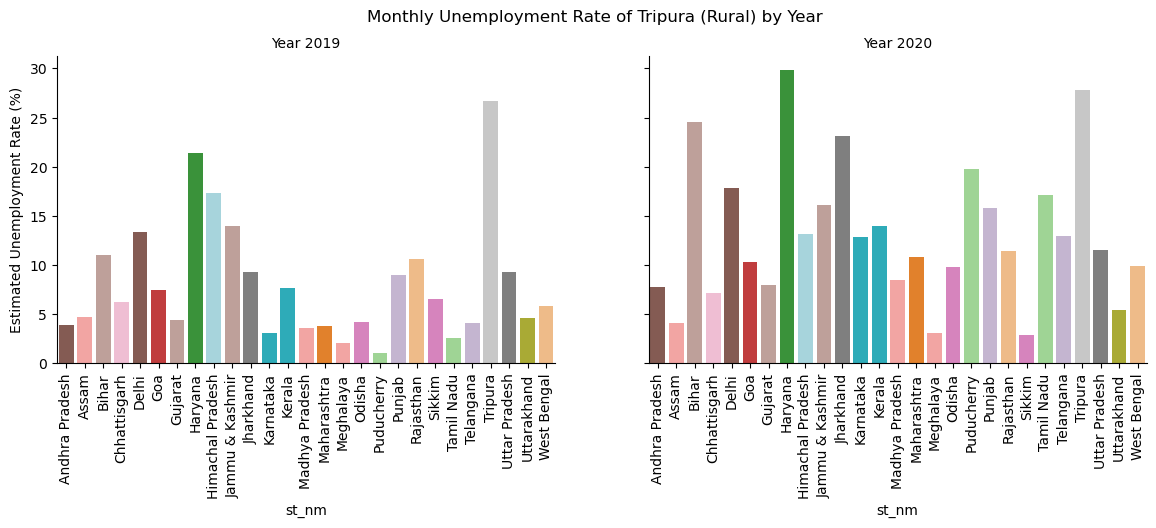

In [27]:
g = sns.FacetGrid(mean_unemployment_rate_Rural, col='Year', height=4, aspect=1.5)

# Giving randon color to each region for plots:

import random     # Importing random function:
num_colors = len(df_1['Region'].unique())
random_colors = [plt.cm.tab20(random.randint(0, 19)) for _ in range(num_colors)]

# making bar plot for rural area:

g.map(sns.barplot,'st_nm','Estimated Unemployment Rate (%)', palette=random_colors)
g.set_axis_labels('st_nm', 'Estimated Unemployment Rate (%)')
g.set_titles('Year {col_name}')
g.fig.suptitle("Monthly Unemployment Rate of Tripura (Rural) by Year", y=1.03)
g.set_xticklabels(rotation=90)
plt.show()

Above graphs showing 2019 and 2020 year average unemployment rate of different regions in "Rural" Areas.

In Year 2019, "Tripura" region has the highest unemployment rate through out the year on average while "Punducherry " was with 
the least unemployment rate on average throughout the year.

Similarly,In Year 2020, "Haryana" region has the highest unemployment rate through out the year on average while "Meghalaya" was with the least unemployment rate on average throughout the year.

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


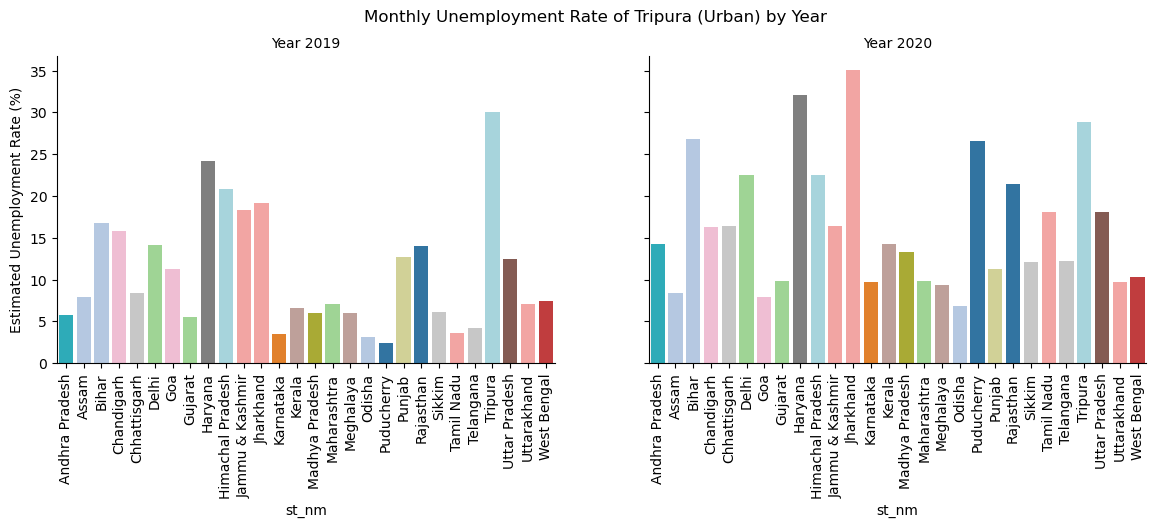

In [28]:
g = sns.FacetGrid(mean_unemployment_rate_Urban, col='Year', height=4, aspect=1.5)

# Giving randon color to each region for plots:

import random      # Importing random function:

num_colors = len(df_1['Region'].unique())
random_colors = [plt.cm.tab20(random.randint(0, 19)) for _ in range(num_colors)]

# making bar plot for rural area:

g.map(sns.barplot,'st_nm','Estimated Unemployment Rate (%)', palette=random_colors)
g.set_axis_labels('st_nm', 'Estimated Unemployment Rate (%)')
g.set_titles('Year {col_name}')
g.fig.suptitle("Monthly Unemployment Rate of Tripura (Urban) by Year", y=1.03)
g.set_xticklabels(rotation=90)
plt.show()

Above graphs showing 2019 and 2020 year average unemployment rate of different regions in "Urban" Areas.

In Year 2019, "Tripura" region has the highest unemployment rate through out the year on average while "Punducherry " was with 
the least unemployment rate on average throughout the year.

Similarly,In Year 2020, "Jharkhand" region has the highest unemployment rate through out the year on average while "Odisha" was with the least unemployment rate on average throughout the year.

# Average unemployment rate in both areas in both years:

In [29]:
# fetching geojson file from system for map visuals:
cities_gdf = gpd.read_file(r'D:/hamza/B pillar/Oasis data/Unemployment data/states_india.geojson')

<Figure size 26000x50000 with 0 Axes>

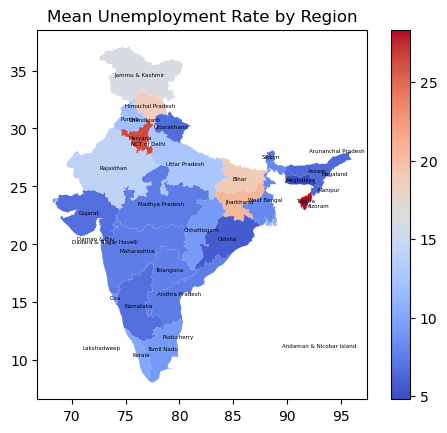

In [30]:
plt.figure(figsize=(260, 500))
city_data_gdf = cities_gdf.merge(df_mean, on='st_nm', how='left')
city_data_gdf.plot(column='Estimated Unemployment Rate (%)', cmap='coolwarm', legend=True)
plt.title('Mean Unemployment Rate by Region')

# Allocating name on map plot:

for idx, row in city_data_gdf.iterrows():
    centroid = row['geometry'].centroid
    # Annotate the centroid with the state name
    plt.annotate(row['st_nm'], (centroid.x, centroid.y), fontsize=4, ha='center', va='center')
plt.show()

by observing the data, it is known that average unemployment rate in both year 2019 and 2020 including urban and rural areas,in "Haryana" highest than any other state and a state with least average unemployment rate is "Meghalaya"

# Checking the insight of Haryana Region:

As Haryana is with the highest unemployment rate on average in both rural and urban areas so we will see its insights.

In [31]:
# Fetching the data of Haryana:
Haryana_df=df_1[df_1['Region']=='Haryana']

In [32]:
# extracting data of haryana with rural area:
Rural_data_Haryana=Haryana_df[Haryana_df['Area']=='Rural']
Rural_data_Haryana

,Region,Day,Month,Year,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
94,Haryana,31,5,2019,Monthly,14.54,5249186.0,45.12,Rural
95,Haryana,30,6,2019,Monthly,23.08,4745178.0,45.23,Rural
96,Haryana,31,7,2019,Monthly,16.22,4826560.0,42.17,Rural
97,Haryana,31,8,2019,Monthly,30.94,4558306.0,48.23,Rural
98,Haryana,30,9,2019,Monthly,16.36,5127956.0,44.72,Rural
99,Haryana,31,10,2019,Monthly,24.17,4798833.0,46.07,Rural
100,Haryana,30,11,2019,Monthly,16.59,4875763.0,42.48,Rural
101,Haryana,31,12,2019,Monthly,29.56,4603484.0,47.40,Rural
102,Haryana,31,1,2020,Monthly,16.21,5062293.0,43.74,Rural
103,Haryana,29,2,2020,Monthly,27.19,4570108.0,45.37,Rural


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


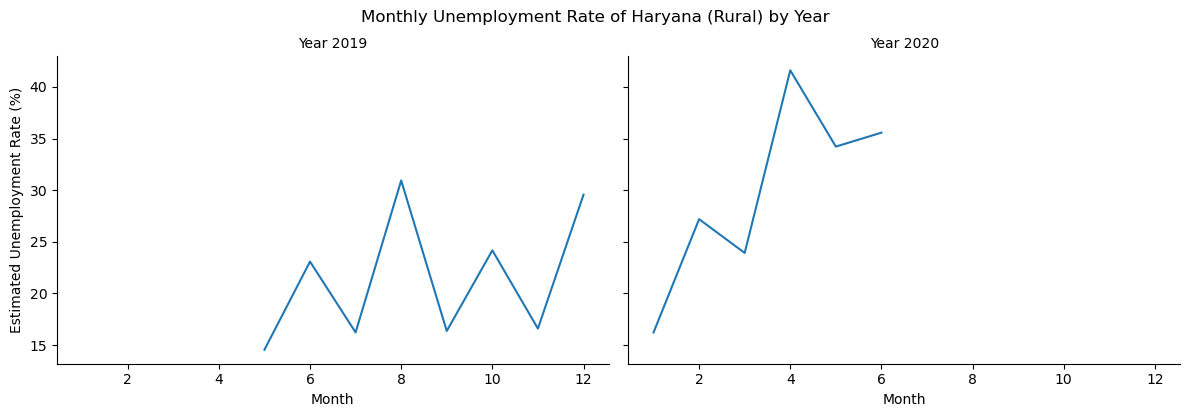

In [33]:
# Making LLine graph of each moth to check the trend of unemployment rate in Harayan (Rural Areas):
g = sns.FacetGrid(Rural_data_Haryana, col='Year', height=4, aspect=1.5)
g.map(sns.lineplot,'Month','Estimated Unemployment Rate (%)')
g.set_axis_labels('Month', 'Estimated Unemployment Rate (%)')
g.set_titles('Year {col_name}')
g.fig.suptitle("Monthly Unemployment Rate of Haryana (Rural) by Year", y=1.03)
plt.show()

It is shown above that the highest unemployment rate in Haryana (Rural area) was in April, 2020. When Corona pandemic was in the mid life.

In [34]:
# Extracting data of haryana in Urban areas:
Urban_data_Haryana=Haryana_df[Haryana_df['Area']=='Urban']

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


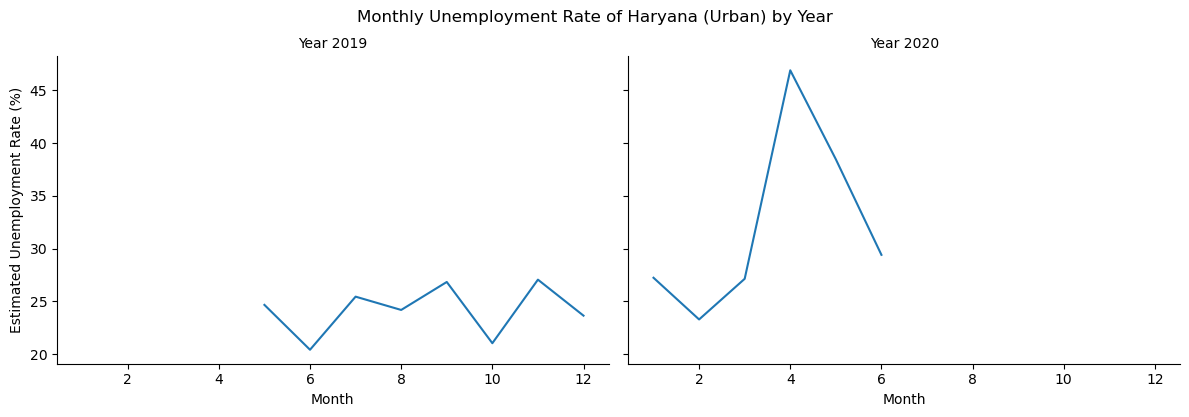

In [35]:
# Making LLine graph of each moth to check the trend of unemployment rate in Harayan (Urban Areas):
g = sns.FacetGrid(Urban_data_Haryana, col='Year', height=4, aspect=1.5)
g.map(sns.lineplot,'Month','Estimated Unemployment Rate (%)')
g.set_axis_labels('Month', 'Estimated Unemployment Rate (%)')
g.set_titles('Year {col_name}')
g.fig.suptitle("Monthly Unemployment Rate of Haryana (Urban) by Year", y=1.03)
plt.show()

it is shown above that in Urban Areas, same month (April, 2020) was with the highest unemployment rate.

In [36]:
# Extracting the data of estimated people employed in different regions in 2019 and 2020 in different areas:
region_est_employed_df=df_1.groupby(['Region','Year','Area'])['Estimated Employed'].mean().reset_index()

In [37]:
region_est_employed_df

,Region,Year,Area,Estimated Employed
0,Andhra Pradesh,2019,Rural,1.204096e+07
1,Andhra Pradesh,2019,Urban,4.763128e+06
2,Andhra Pradesh,2020,Rural,1.149878e+07
3,Andhra Pradesh,2020,Urban,4.148210e+06
4,Assam,2019,Rural,9.909392e+06
...,...,...,...,...
105,Uttarakhand,2020,Urban,8.490012e+05
106,West Bengal,2019,Rural,2.490992e+07
107,West Bengal,2019,Urban,1.099756e+07
108,West Bengal,2020,Rural,2.229734e+07


In [38]:
# Data of only Rural areas:
region_est_employed_df_year_2019_2020_rural=region_est_employed_df[region_est_employed_df['Area']=='Rural']

In [39]:
# Data of only Urban areas:
region_est_employed_df_year_2019_2020_urban=region_est_employed_df[region_est_employed_df['Area']=='Urban']

In [40]:
region_est_employed_df_year_2019_2020_rural

,Region,Year,Area,Estimated Employed
0,Andhra Pradesh,2019,Rural,1.204096e+07
2,Andhra Pradesh,2020,Rural,1.149878e+07
4,Assam,2019,Rural,9.909392e+06
6,Assam,2020,Rural,9.446733e+06
8,Bihar,2019,Rural,2.340606e+07
10,Bihar,2020,Rural,1.976054e+07
14,Chhattisgarh,2019,Rural,6.659487e+06
16,Chhattisgarh,2020,Rural,6.291282e+06
18,Delhi,2019,Rural,1.575726e+05
20,Delhi,2020,Rural,1.358182e+05


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


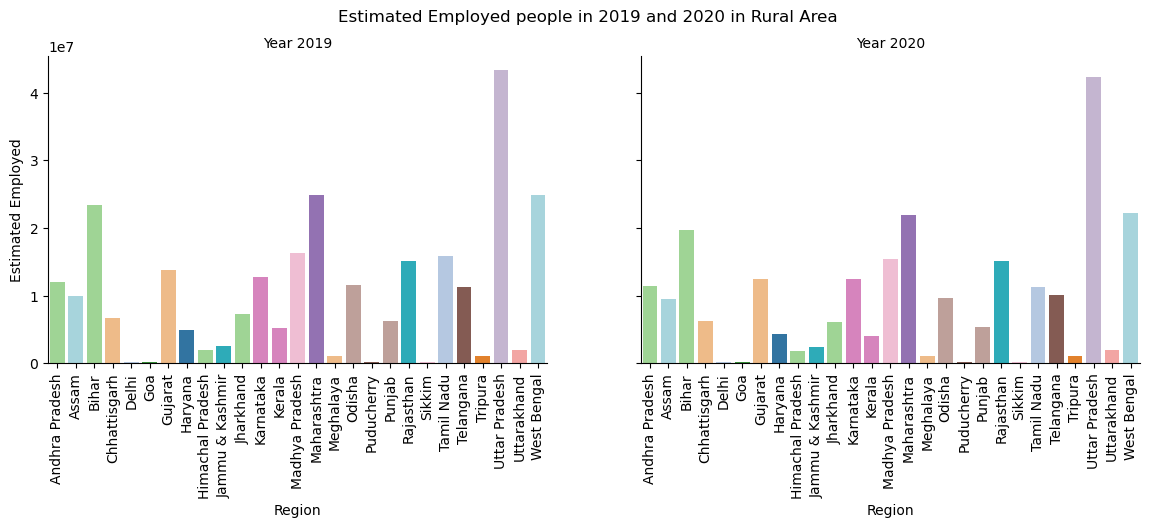

In [41]:
# Making subplots of 2019 and 2020 year of estimated employed people in Different Regions:

g = sns.FacetGrid(region_est_employed_df_year_2019_2020_rural, col='Year', height=4, aspect=1.5)

# Alloting different color to each region in bar plot:

import random 

num_colors = len(region_est_employed_df['Region'].unique())
random_colors = [plt.cm.tab20(random.randint(0, 19)) for _ in range(num_colors)]

# Creating bar plot:

g.map(sns.barplot,'Region','Estimated Employed', palette=random_colors)
g.set_axis_labels('Region', 'Estimated Employed')
g.set_titles('Year {col_name}')
g.fig.suptitle("Estimated Employed people in 2019 and 2020 in Rural Area", y=1.03)

g.set_xticklabels(rotation=90)
plt.show()

Above graphs showing 2019 and 2020 year average Estimated employed people of different regions in "Rural" Areas.

In Year 2019, "Uttar Pradesh" region has the highest unemployment rate through out the year on average while "Dehli" was with the least unemployment rate on average throughout the year.

Similarly,In Year 2020, "Uttar Pradesh" region has the highest unemployment rate through out the year on average while "Sikkim" was with the least unemployment rate on average throughout the year.

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


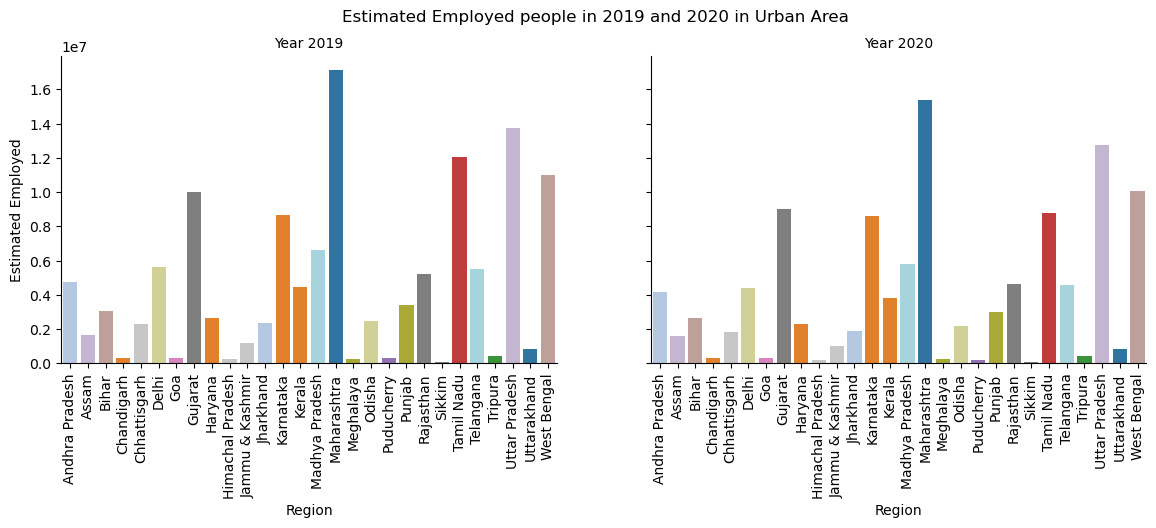

In [42]:
# Making subplots of 2019 and 2020 year of estimated employed people in Different Regions:

g = sns.FacetGrid(region_est_employed_df_year_2019_2020_urban, col='Year', height=4, aspect=1.5)

# Alloting different color to each region in bar plot:


import random

num_colors = len(region_est_employed_df['Region'].unique())
random_colors = [plt.cm.tab20(random.randint(0, 19)) for _ in range(num_colors)]

# Creating bar plot:

g.map(sns.barplot,'Region','Estimated Employed', palette=random_colors)
g.set_axis_labels('Region', 'Estimated Employed')
g.set_titles('Year {col_name}')
g.fig.suptitle("Estimated Employed people in 2019 and 2020 in Urban Area", y=1.03)

g.set_xticklabels(rotation=90)
plt.show()

Above graphs showing 2019 and 2020 year average Estimated employed people of different regions in "Urban" Areas.

In Year 2019, "Maharashtra" region has the highest unemployment rate through out the year on average while "Sikkim" was with the least unemployment rate on average throughout the year.

Similarly,In Year 2020, "Maharashtra" region has the highest unemployment rate through out the year on average while "Sikkim" was with the least unemployment rate on average throughout the year.

# Insights of Estiamted labour participation rate(%):

In [116]:
mean_est_labour_participation_rate_region_year=df_1.groupby(['Region','Year','Area'])['Estimated Labour Participation Rate (%)'].mean().reset_index()

In [117]:
mean_est_labour_participation_rate_region_year

,Region,Year,Area,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,2019,Rural,43.323750
1,Andhra Pradesh,2019,Urban,36.866250
2,Andhra Pradesh,2020,Rural,42.483333
3,Andhra Pradesh,2020,Urban,34.350000
4,Assam,2019,Rural,48.338571
...,...,...,...,...
105,Uttarakhand,2020,Urban,32.243333
106,West Bengal,2019,Rural,48.846250
107,West Bengal,2019,Urban,44.928750
108,West Bengal,2020,Rural,44.871667


In [118]:
mean_est_labour_participation_rate_region_year_Rural=mean_est_labour_participation_rate_region_year[mean_est_labour_participation_rate_region_year['Area']=='Rural']

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


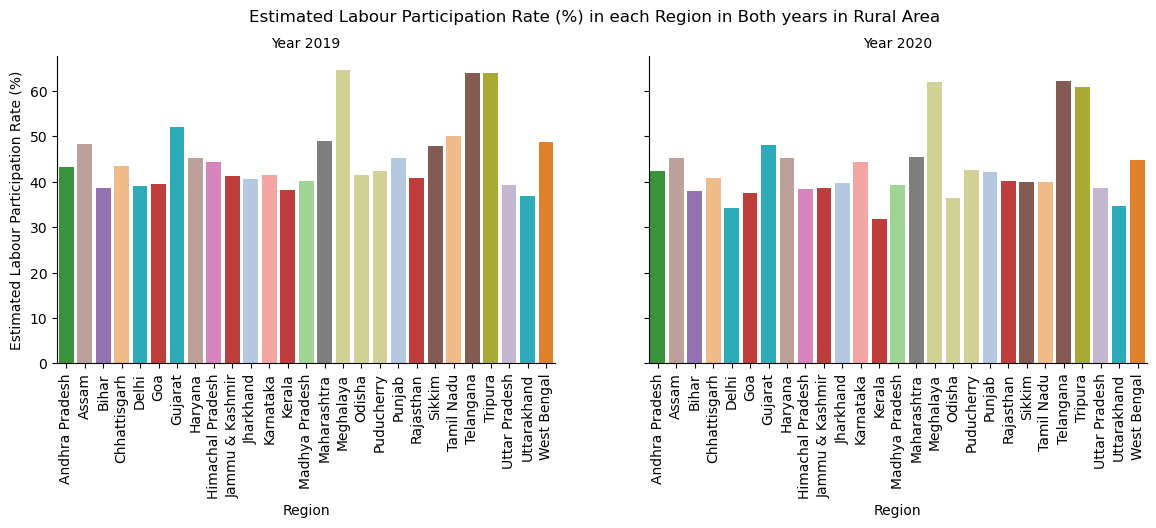

In [119]:
# Making subplots of 2019 and 2020 year of estimated employed people in Different Regions:

g = sns.FacetGrid(mean_est_labour_participation_rate_region_year_Rural, col='Year', height=4, aspect=1.5)

# Alloting different color to each region in bar plot:


import random

num_colors = len(df_1['Region'].unique())
random_colors = [plt.cm.tab20(random.randint(0, 19)) for _ in range(num_colors)]

# Creating bar plot:

g.map(sns.barplot,'Region','Estimated Labour Participation Rate (%)', palette=random_colors)
g.set_axis_labels('Region', 'Estimated Labour Participation Rate (%)')
g.set_titles('Year {col_name}')
g.fig.suptitle("Estimated Labour Participation Rate (%) in each Region in Both years in Rural Area", y=1.03)

g.set_xticklabels(rotation=90)
plt.show()

By looking at the above graphs, it has been found that:
   In year 2019 in Rural area, "Meghalaya" state has the highest Estimated Labour participation rate (%) while in 2020, "Telangana" gave competition to Meghalaya and ended up very near to each other.

In [120]:
mean_est_labour_participation_rate_region_year_urban=mean_est_labour_participation_rate_region_year[mean_est_labour_participation_rate_region_year['Area']=='Urban']

In [121]:
mean_est_labour_participation_rate_region_year_urban

,Region,Year,Area,Estimated Labour Participation Rate (%)
1,Andhra Pradesh,2019,Urban,36.866250
3,Andhra Pradesh,2020,Urban,34.350000
5,Assam,2019,Urban,44.217500
7,Assam,2020,Urban,41.328333
9,Bihar,2019,Urban,38.548750
11,Bihar,2020,Urban,37.013333
12,Chandigarh,2019,Urban,39.921250
13,Chandigarh,2020,Urban,38.167500
15,Chhattisgarh,2019,Urban,46.256250
17,Chhattisgarh,2020,Urban,39.075000


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


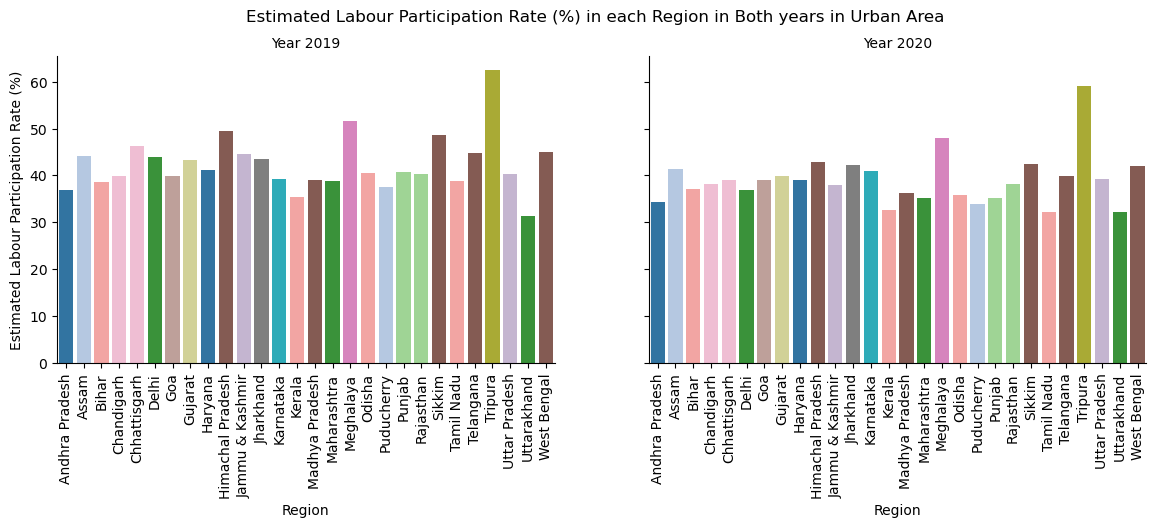

In [122]:
# Making subplots of 2019 and 2020 year of estimated employed people in Different Regions:

g = sns.FacetGrid(mean_est_labour_participation_rate_region_year_urban, col='Year', height=4, aspect=1.5)

# Alloting different color to each region in bar plot:


import random

num_colors = len(df_1['Region'].unique())
random_colors = [plt.cm.tab20(random.randint(0, 19)) for _ in range(num_colors)]

# Creating bar plot:

g.map(sns.barplot,'Region','Estimated Labour Participation Rate (%)', palette=random_colors)
g.set_axis_labels('Region', 'Estimated Labour Participation Rate (%)')
g.set_titles('Year {col_name}')
g.fig.suptitle("Estimated Labour Participation Rate (%) in each Region in Both years in Urban Area", y=1.03)

g.set_xticklabels(rotation=90)
plt.show()

By looking at the above graphs, it has been found that:
   In year 2019 in Urban Area, "Tripura" state has the highest Estimated Labour participation rate (%) and in 2020, it maintain its position.

# Dataset # 2: (Unemployment_Rate_upto_11_2020)

In [43]:
df_2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [44]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [45]:
# Removing gap in column name:
col_map={col:col.strip() for col in df_2.columns}
df_2.rename(columns=col_map,inplace =True)

In [46]:
df_2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [47]:
# changing date column data type to datetime:
df_2['Date']=pd.to_datetime(df_2['Date'],dayfirst=True)

In [48]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

In [49]:
# splitting year, month and day from date column:
df_2['Year']=df_2['Date'].dt.year
df_2['Month']=df_2['Date'].dt.month
df_2['Day']=df_2['Date'].dt.day

In [50]:
# dropping Date column:
df_2=df_2.drop('Date',axis=1)

In [51]:
# renaming 'Region' and 'Region.1' columns to State and region:
df_2=df_2.rename(columns={'Region':'State'})
df_2=df_2.rename(columns={'Region.1':'Region'})

In [52]:
df_2=df_2[['State','Frequency','Day','Month','Year','Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)','Region','longitude','latitude']]

In [53]:
df_2

,State,Frequency,Day,Month,Year,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
0,Andhra Pradesh,M,31,1,2020,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,M,29,2,2020,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,M,31,3,2020,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,M,30,4,2020,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,M,31,5,2020,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,M,30,6,2020,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,M,31,7,2020,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,M,31,8,2020,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,M,30,9,2020,9.35,35707239,47.73,East,22.9868,87.855


In [54]:
df_2['Year'].unique()         # Dataset consist of year 2020 only.

array([2020])

In [58]:
Mean_df_2_Est_unemployment_rate_region=df_2.groupby(['Region'])['Estimated Unemployment Rate (%)'].mean().reset_index()

In [59]:
Mean_df_2_Est_unemployment_rate_region

,Region,Estimated Unemployment Rate (%)
0,East,13.916000
1,North,15.889620
2,Northeast,10.950263
3,South,10.454667
4,West,8.239000


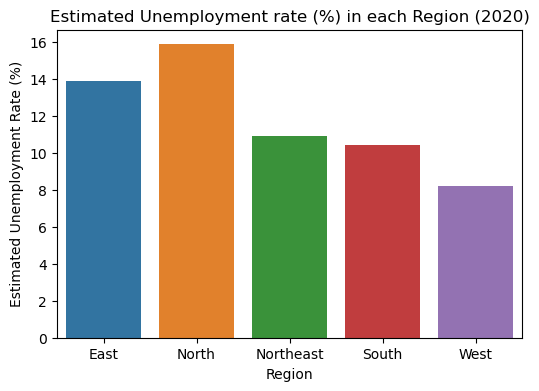

In [78]:
plt.figure(figsize=(6,4))

# Making bar graph

sns.barplot(data=Mean_df_2_Est_unemployment_rate_region,x='Region',y='Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment rate (%) in each Region (2020)')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

In [63]:
Mean_df_2_Est_unemployment_rate_region_state=df_2.groupby(['Region','State'])['Estimated Unemployment Rate (%)'].mean().reset_index()

In [64]:
Mean_df_2_Est_unemployment_rate_region_state

,Region,State,Estimated Unemployment Rate (%)
0,East,Bihar,19.471000
1,East,Jharkhand,19.539000
2,East,Odisha,6.462000
3,East,West Bengal,10.192000
4,North,Delhi,18.414000
5,North,Haryana,27.477000
6,North,Himachal Pradesh,16.065000
7,North,Jammu & Kashmir,16.477778
8,North,Punjab,11.981000
9,North,Rajasthan,15.868000


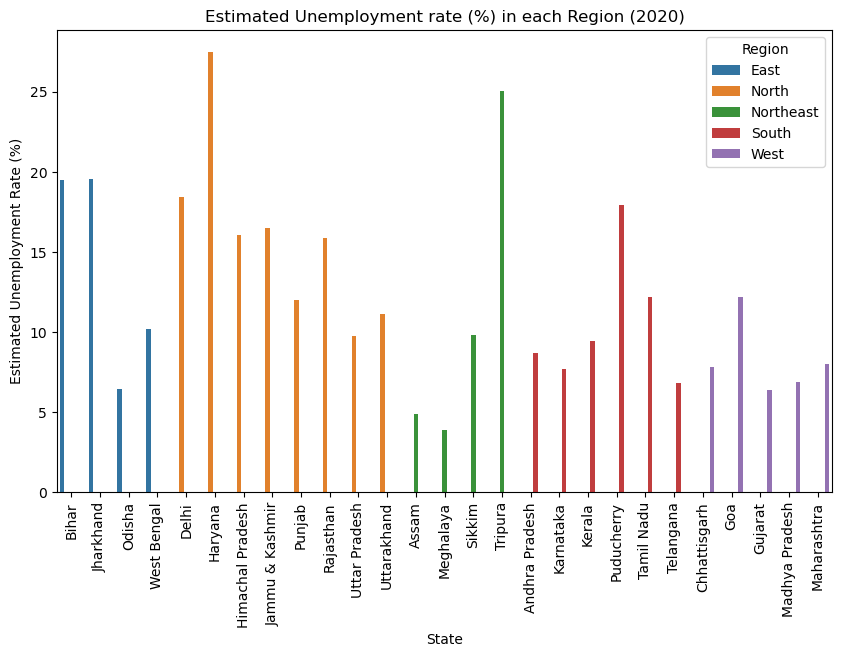

In [76]:
plt.figure(figsize=(10,6))

# Making bar graph:

Bar_1=sns.barplot(data=Mean_df_2_Est_unemployment_rate_region_state,x='State',y='Estimated Unemployment Rate (%)',hue='Region')
plt.title('Estimated Unemployment rate (%) in each Region (2020)')
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
Bar_1.set_xticklabels(Bar_1.get_xticklabels(),rotation=90)
plt.show()

By studying the above both graphs, it is observed that the highest average unemployment rate (%) is in 'East' and 'North'.

Also, we have seen in 2nd graph that in "East", 'Bihar' and 'Jharkhand' has highest average unempoyment rate (%) while in "North", 'Haryana' and 'Dehli' has the highest respectively.

Also, considering the "Northeast" region, only 'Tripura' is going toe to toe with the other state in unemployment rate(%).

In [93]:
mean_est_lab_participation_rate_region=df_2.groupby(['Region'])['Estimated Labour Participation Rate (%)'].mean().reset_index()

In [94]:
mean_est_lab_participation_rate_region

,Region,Estimated Labour Participation Rate (%)
0,East,40.108750
1,North,38.702658
2,Northeast,52.055263
3,South,40.436167
4,West,41.257000


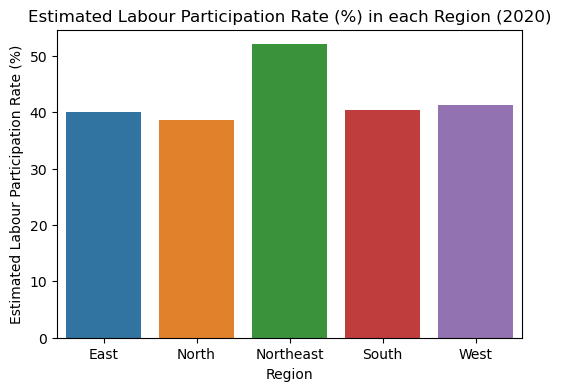

In [97]:
plt.figure(figsize=(6,4))

# Making bar graph

sns.barplot(data=mean_est_lab_participation_rate_region_state,x='Region',y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%) in each Region (2020)')
plt.xlabel('Region')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show()

In [101]:
# extracting dataset with estimated labour participation rate(%) in each Region:
mean_est_lab_participation_rate_region_state=df_2.groupby(['Region','State'])['Estimated Labour Participation Rate (%)'].mean().reset_index()

In [102]:
mean_est_lab_participation_rate_region_state

,Region,State,Estimated Labour Participation Rate (%)
0,East,Bihar,37.173000
1,East,Jharkhand,40.356000
2,East,Odisha,37.748000
3,East,West Bengal,45.158000
4,North,Delhi,35.857000
5,North,Haryana,42.100000
6,North,Himachal Pradesh,40.252000
7,North,Jammu & Kashmir,37.894444
8,North,Punjab,39.979000
9,North,Rajasthan,40.591000


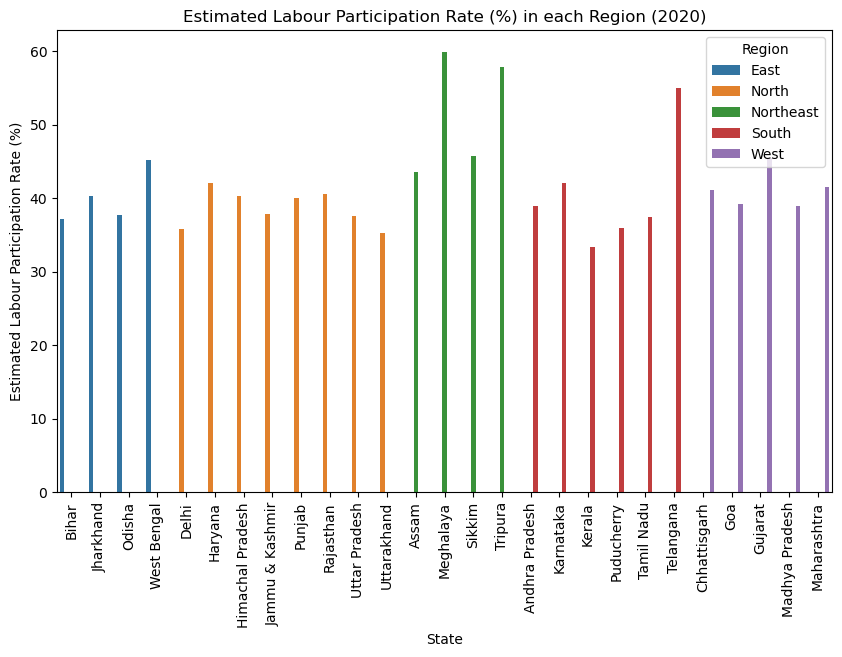

In [103]:
plt.figure(figsize=(10,6))

# Making bar graph:

Bar_1=sns.barplot(data=mean_est_lab_participation_rate_region_state,x='State',y='Estimated Labour Participation Rate (%)',hue='Region')
plt.title('Estimated Labour Participation Rate (%) in each Region (2020)')
plt.xlabel('State')
plt.ylabel('Estimated Labour Participation Rate (%)')
Bar_1.set_xticklabels(Bar_1.get_xticklabels(),rotation=90)
plt.show()

By studying the above both graphs, it is observed that the highest average Labour Participation rate (%) is in 'Northeast' and 'West' in 2020.

Also, we have seen in 2nd graph that in "Northeast", 'Meghalaya' and 'Tripura' has highest average Labour participation rate (%) while in "West", 'Gujrat'  has the highest respectively.

Also, considering the "South" region, only 'Telangana' is going toe to toe with the other state in Labour participation rate(%).